<a href="https://colab.research.google.com/github/gsranjitha897/gsranjitha897/blob/main/credit_card_default_case_study_Analysis_DA_project_BEPEC_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analyst Project:  Credit Card Default Case Study  Analysis

Problem Statement:
    
    
        A Card issuing Bank has over issued its cash and credit card in-order-to increase its market share,
        even to unqualified applicants. At the same time, most cardholders, irrespective of their repayment
        ability,overused credit card for consumption and accumulated heavy credit and cash– card debts.
        The crisis caused the blow to consumer finance confidence and it is a big challenge for both banks
        and cardholders.From the perspective of risk control, estimating the probability of default will be
        ore meaningful than classifying customers into the binary results – risky and non-risky.

# Import necessary libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import numpy as np  # Import NumPy

# Load the dataset
data = pd.read_csv("C:/Users/user/Documents/BEPEC projects POWER BI/credit card trend analysis/__Dataset ~Credit card trend analysis__.csv") # Replace "your_dataset.csv" with the actual file path

# Display the first few rows of the dataset
data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# perform some basic EDA:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

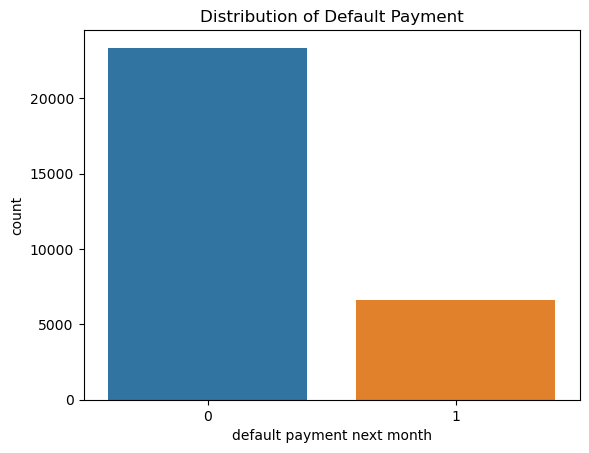

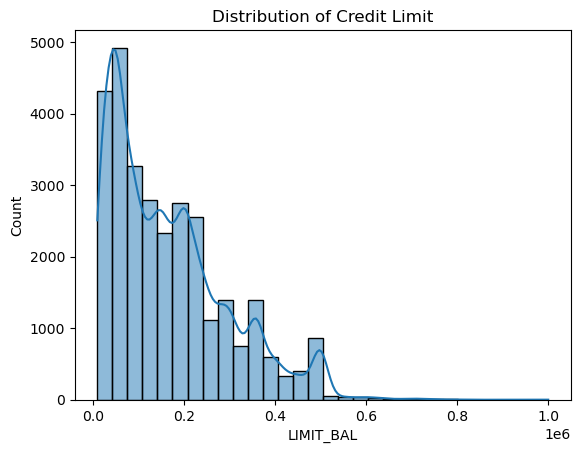

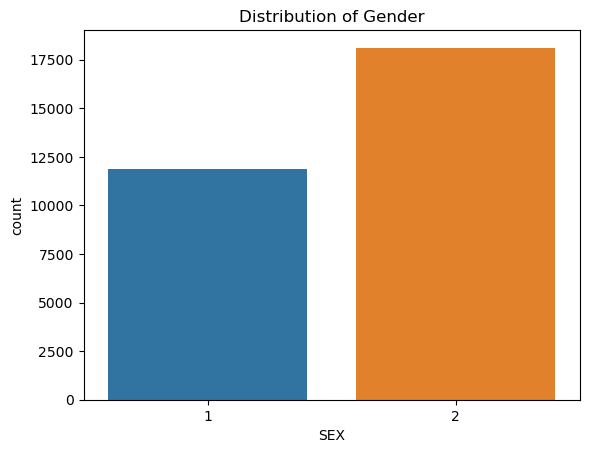

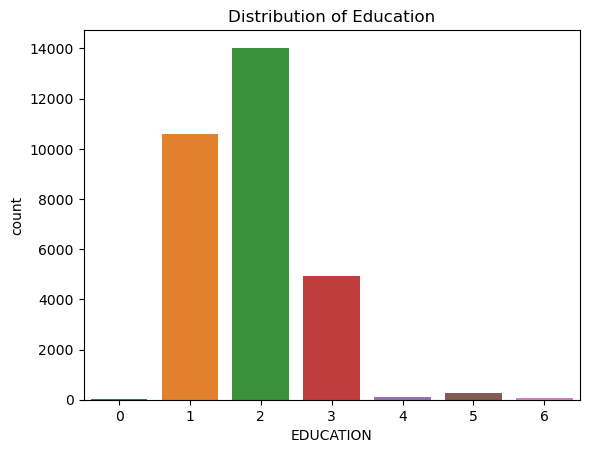

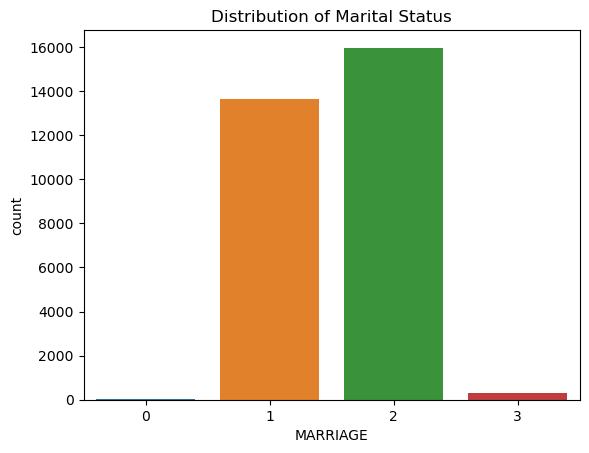

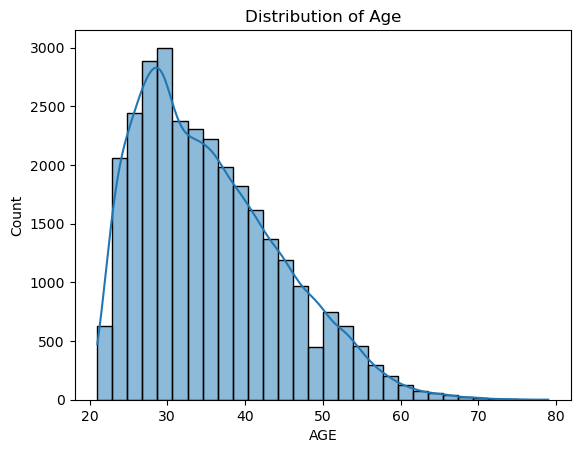

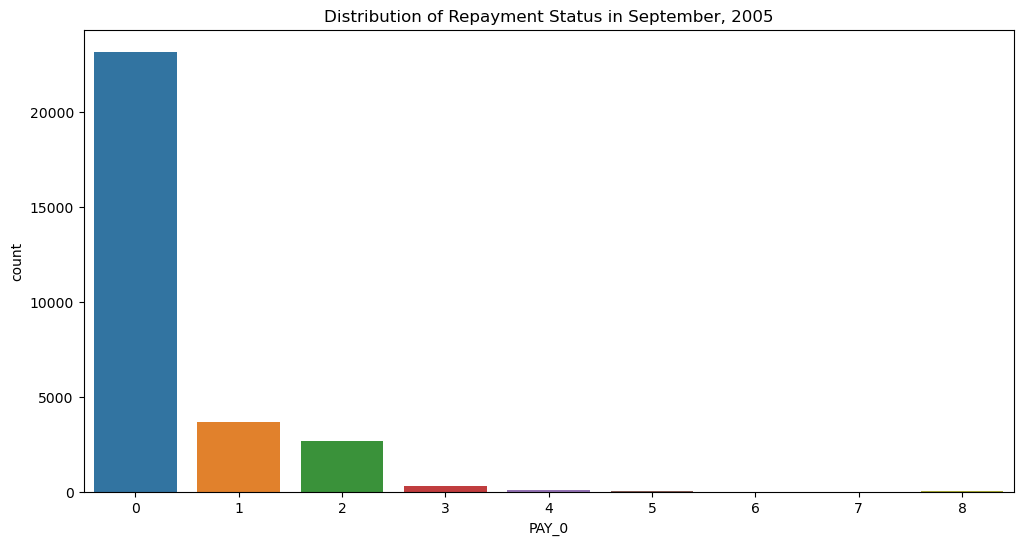

In [ ]:
# Check the structure of the dataset
data.info()

# Check for missing values
data.isnull().sum()

# Explore the distribution of the target variable
sns.countplot(x='default payment next month', data=data)
plt.title('Distribution of Default Payment')
plt.show()

# Explore the distribution of key features
sns.histplot(data['LIMIT_BAL'], bins=30, kde=True)
plt.title('Distribution of Credit Limit')
plt.show()

sns.countplot(x='SEX', data=data)
plt.title('Distribution of Gender')
plt.show()

sns.countplot(x='EDUCATION', data=data)
plt.title('Distribution of Education')
plt.show()

sns.countplot(x='MARRIAGE', data=data)
plt.title('Distribution of Marital Status')
plt.show()

sns.histplot(data['AGE'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

# Explore the distribution of repayment status
plt.figure(figsize=(12, 6))
sns.countplot(x='PAY_0', data=data)
plt.title('Distribution of Repayment Status in September, 2005')
plt.show()


# 1. Analyze the Trend on Outstanding Amount:

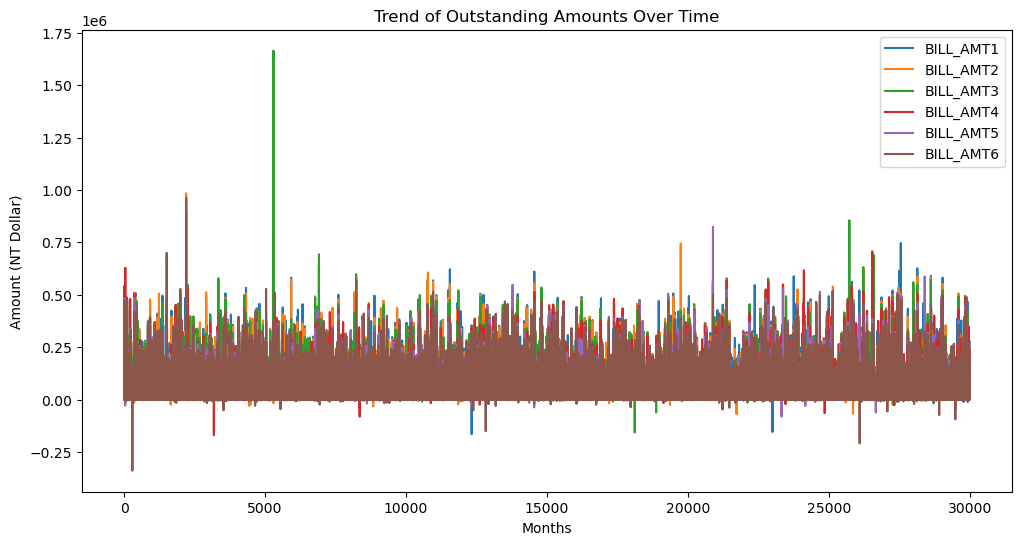

In [ ]:
# Create a new DataFrame for bill statement amounts
bill_columns = ['BILL_AMT' + str(i) for i in range(1, 7)]
bill_data = data[bill_columns]

# Plot the trend of outstanding amounts over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=bill_data, dashes=False)
plt.title('Trend of Outstanding Amounts Over Time')
plt.xlabel('Months')
plt.ylabel('Amount (NT Dollar)')
plt.show()


# 2. Relationship with Age, Education, Marriage, and Credit Limit:

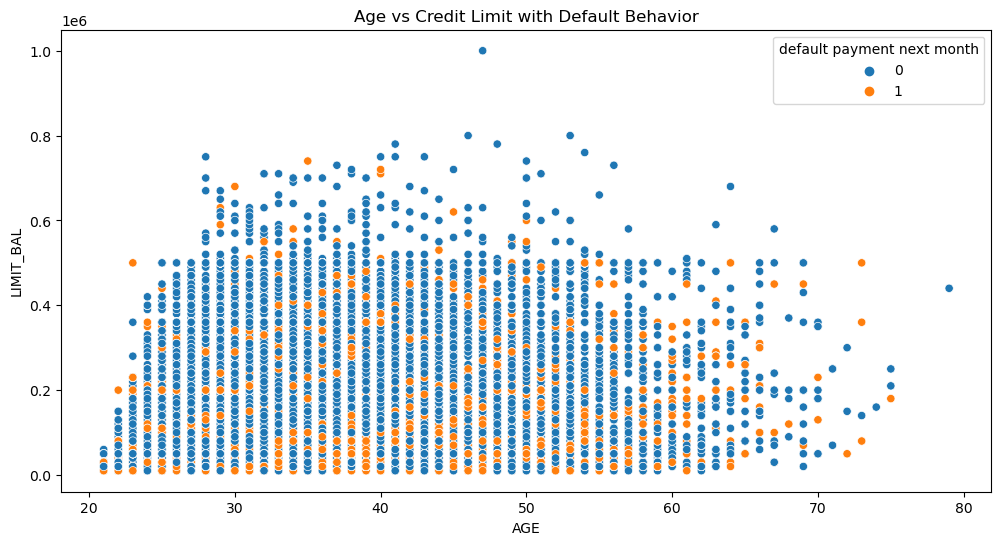

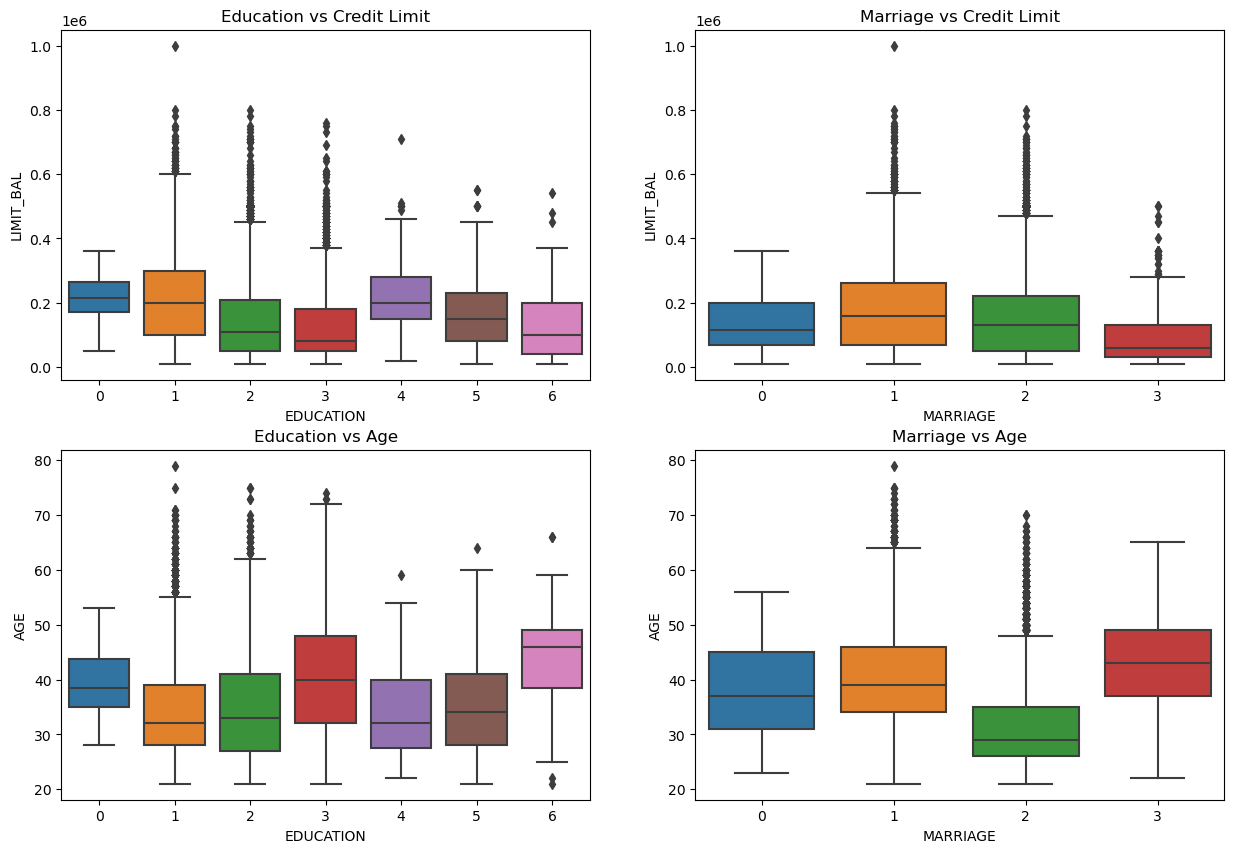

In [ ]:
# Age vs Outstanding Amount
plt.figure(figsize=(12, 6))
sns.scatterplot(x='AGE', y='LIMIT_BAL', hue='default payment next month', data=data)
plt.title('Age vs Credit Limit with Default Behavior')
plt.show()

# Education, Marriage vs Outstanding Amount
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(x='EDUCATION', y='LIMIT_BAL', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Education vs Credit Limit')

sns.boxplot(x='MARRIAGE', y='LIMIT_BAL', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Marriage vs Credit Limit')

sns.boxplot(x='EDUCATION', y='AGE', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Education vs Age')

sns.boxplot(x='MARRIAGE', y='AGE', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Marriage vs Age')

plt.show()


# 3. Outstanding Amount/Trend vs Default Behavior:

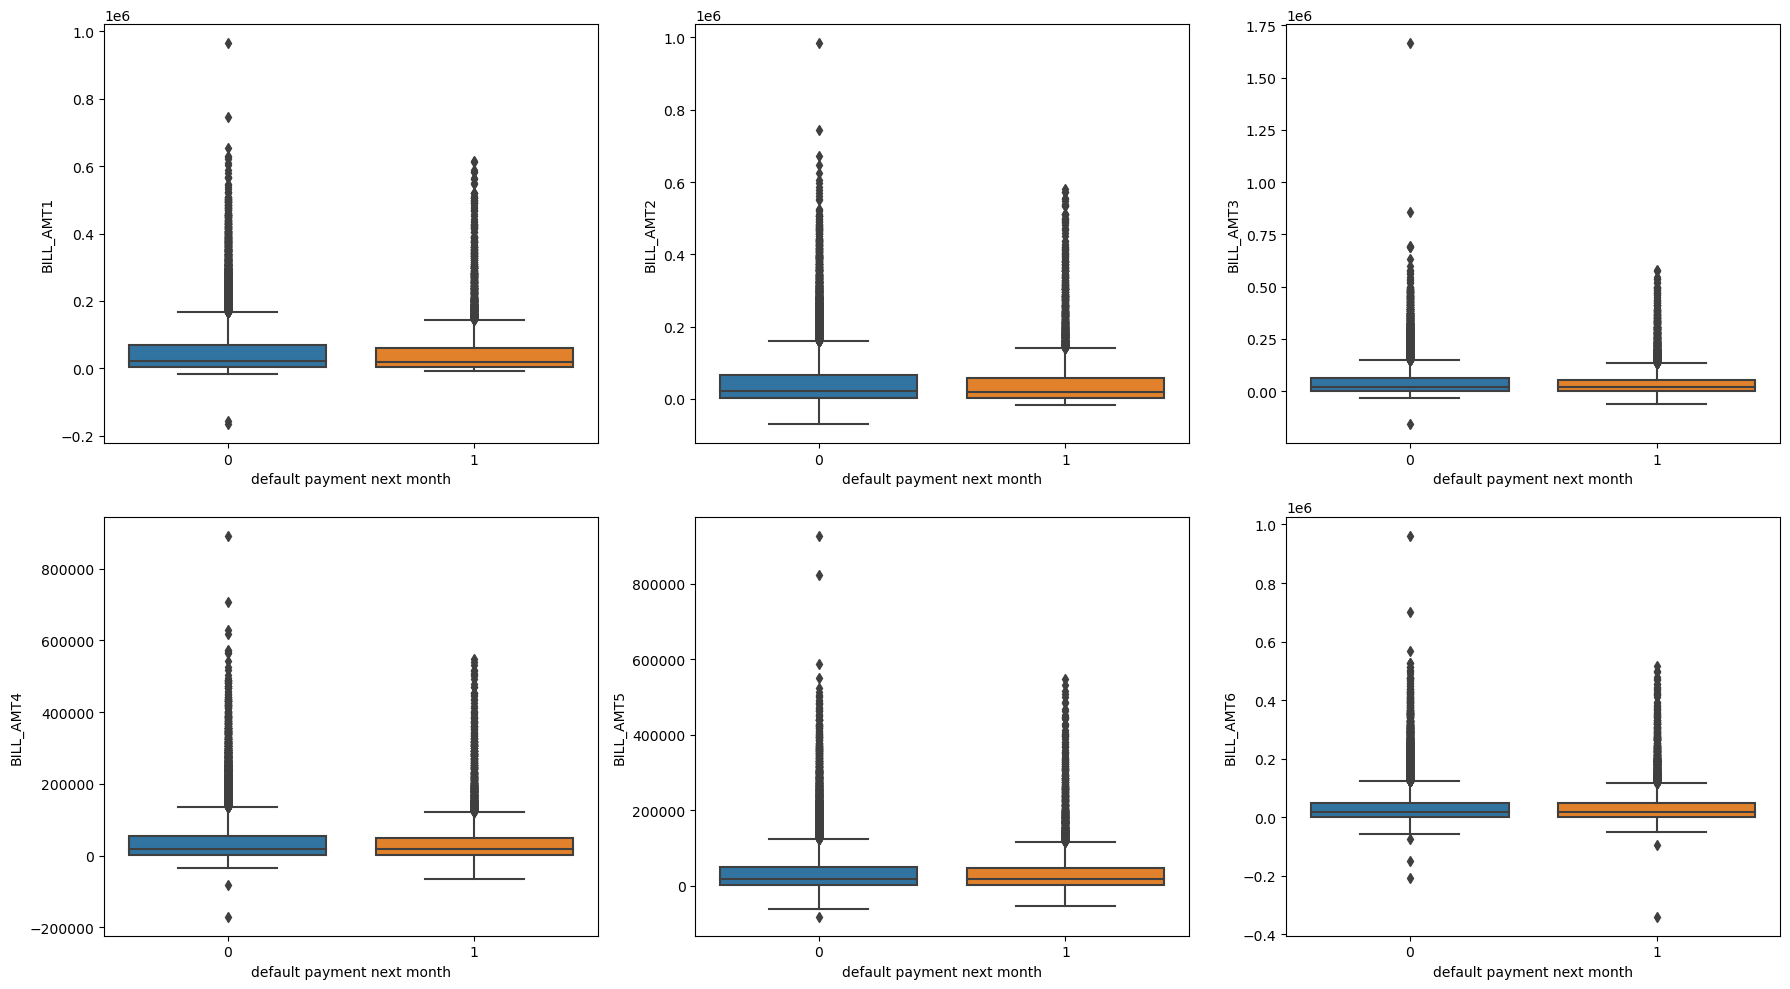

In [ ]:
# Explore the relationship between outstanding amount/trend and default behavior
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i in range(6):
    row = i // 3
    col = i % 3
    sns.boxplot(x='default payment next month', y=bill_columns[i], data=data, ax=axes[row, col])

plt.tight_layout()
plt.show()


# 4. Identify and Clean Errors in the Dataset:

#Inspect the dataset for errors, missing values, and outliers. Based on the EDA, you can address these issues.

# Identify Errors:

# Check  missing values

In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


# Check unique values

In [ ]:
# Check unique values in categorical variables
unique_values = {}
for column in data.columns:
    if data[column].dtype == 'O':  # Check only object (string) columns
        unique_values[column] = data[column].unique()

print("Unique Values in Categorical Variables:")
print(unique_values)


Unique Values in Categorical Variables:
{'SEX': array(['Female', 'Male'], dtype=object), 'EDUCATION': array(['university', 'graduate_school', 'high_school', 5, 'others', 6, 0],
      dtype=object), 'MARRIAGE': array(['married', 'single', 'others', 0], dtype=object), 'PAY_0': array(['payment delay for two months', 'pay duly',
       'payment delay for one month', 'payment delay for three months',
       'payment delay for four months', 'payment delay for eight months',
       'payment delay for seven months', 'payment delay for five months',
       'payment delay for six months'], dtype=object), 'PAY_2': array(['payment delay for two months', 'pay duly',
       'payment delay for three months', 'payment delay for five months',
       'payment delay for seven months', 'payment delay for four months',
       'payment delay for one month', 'payment delay for six months',
       'payment delay for eight months'], dtype=object), 'PAY_3': array(['pay duly', 'payment delay for two months',
   

# Identify outliers

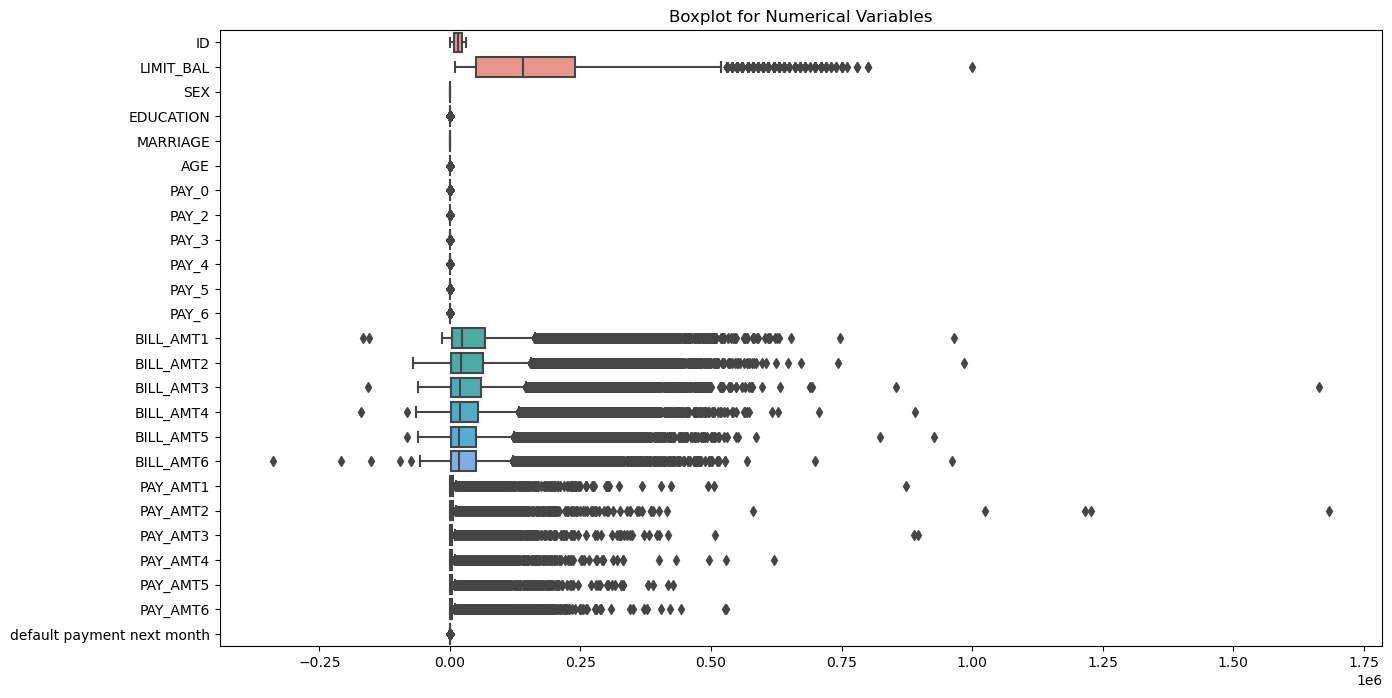

In [ ]:
# Visualize box plots for numerical variables to identify outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=data, orient="h")
plt.title('Boxplot for Numerical Variables')
plt.show()


# Clean Errors:

# Identify non-numeric values



In [ ]:

# Identify non-numeric values in specified columns
columns_to_check = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
                   'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                   'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                   'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for col in columns_to_check:
    unique_values = data[col].unique()
    print(f"Unique values in {col}: {unique_values}")


Unique values in ID: [    1     2     3 ... 29998 29999 30000]
Unique values in LIMIT_BAL: [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
Unique values in SEX: [2 1]
Unique values in EDUCATION: [2 1 3 5 4 6 0]
Unique values in MARRIAGE: [1 2 3 0]
Unique values in AGE: [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 7

# Clean or Replace unique values

In [ ]:

# Clean or Replace unique values in categorical variables


data['EDUCATION'] = data['EDUCATION'].replace({1:'graduate_school',2:'university',3:'high_school',
                                               4:'others',0: 'Unknown',5: 'Uneducate',6:'Phd'})
data['SEX'] = data['SEX'].replace({1:'Male', 2:'Female'})
data['MARRIAGE'] = data['MARRIAGE'].replace({1:'married', 2:'single',3:'others',0: 'Unknown'})
data['default payment next month'] = data['default payment next month'].replace({1:'Yes', 0:'No'})

# Define a mapping for replacement
replacement_mapping = {0: 'pay duly',
                       1: 'payment delay for one month',
                       2: 'payment delay for two months',
                       3: 'payment delay for three months',4:'payment delay for four months',
                       5:'payment delay for five months',6:'payment delay for six months',
                       7:'payment delay for seven months',8:'payment delay for eight months',
                       9:'payment delay for nine months'}

# List of columns to replace
columns_to_replace = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Apply replacement for each column
for col in columns_to_replace:
    data[col] = data[col].replace(replacement_mapping)




In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,Female,university,married,24,payment delay for two months,payment delay for two months,pay duly,pay duly,...,0,0,0,0,689,0,0,0,0,Yes
1,2,120000,Female,university,single,26,pay duly,payment delay for two months,pay duly,pay duly,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,3,90000,Female,university,single,34,pay duly,pay duly,pay duly,pay duly,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,4,50000,Female,university,married,37,pay duly,pay duly,pay duly,pay duly,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,5,50000,Male,university,married,57,pay duly,pay duly,pay duly,pay duly,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


# Visualize the distribution



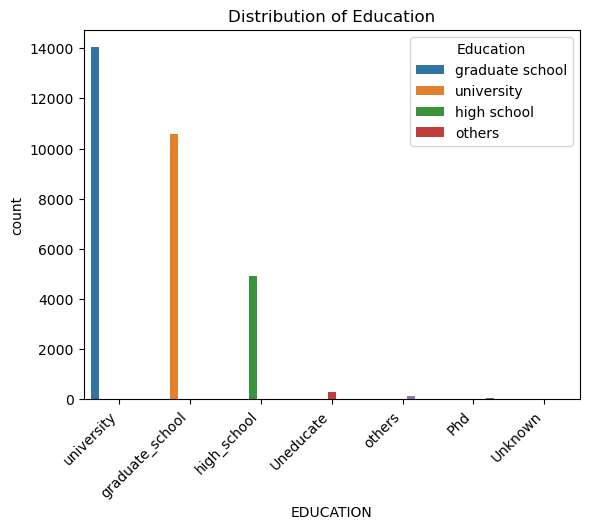

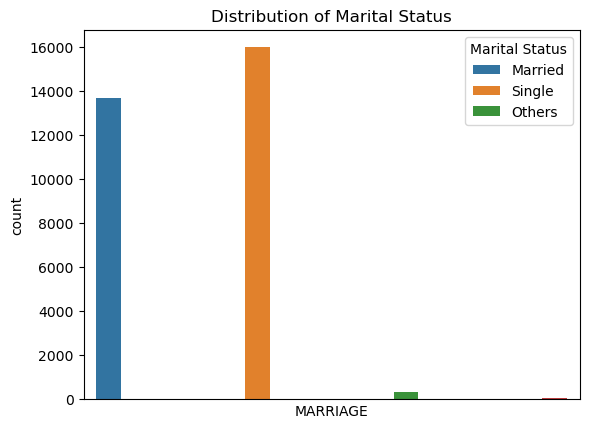

In [ ]:
# Visualize the distribution of values in the columns



# Visualize the distribution of values in the 'EDUCATION' column
sns.countplot(x='EDUCATION', data=data, hue='EDUCATION')
plt.title('Distribution of Education')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle as needed

# Add legend
plt.legend(title='Education', labels=['graduate school','university', 'high school','others'])
plt.show()


# Visualize the distribution of values in the 'MARRIAGE' column
sns.countplot(x='MARRIAGE', data=data,hue='MARRIAGE')
plt.title('Distribution of Marital Status')

# Remove x-axis labels
plt.xticks([])
# Add legend
# Create a legend
plt.legend(title='Marital Status', labels=['Married', 'Single', 'Others'])


plt.show()



# Handle outliers using z-score

In [ ]:
# Identify and handle outliers using z-score
from scipy.stats import zscore
import numpy as np  # Import NumPy

z_scores = zscore(data.select_dtypes(include=['int64', 'float64']))
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)

# Remove outliers
data_cleaned = data[~outliers]


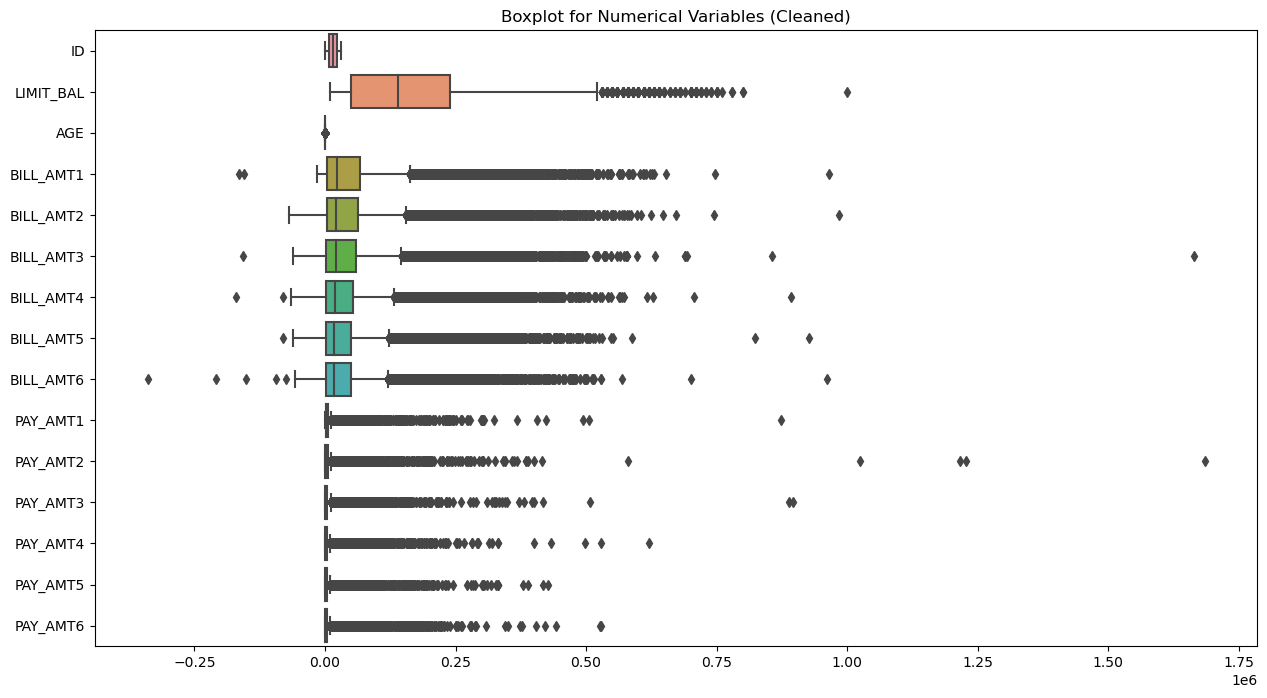

In [ ]:
# Visualize box plots for numerical variables after removing outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=data_cleaned, orient="h")
plt.title('Boxplot for Numerical Variables (Cleaned)')
plt.show()


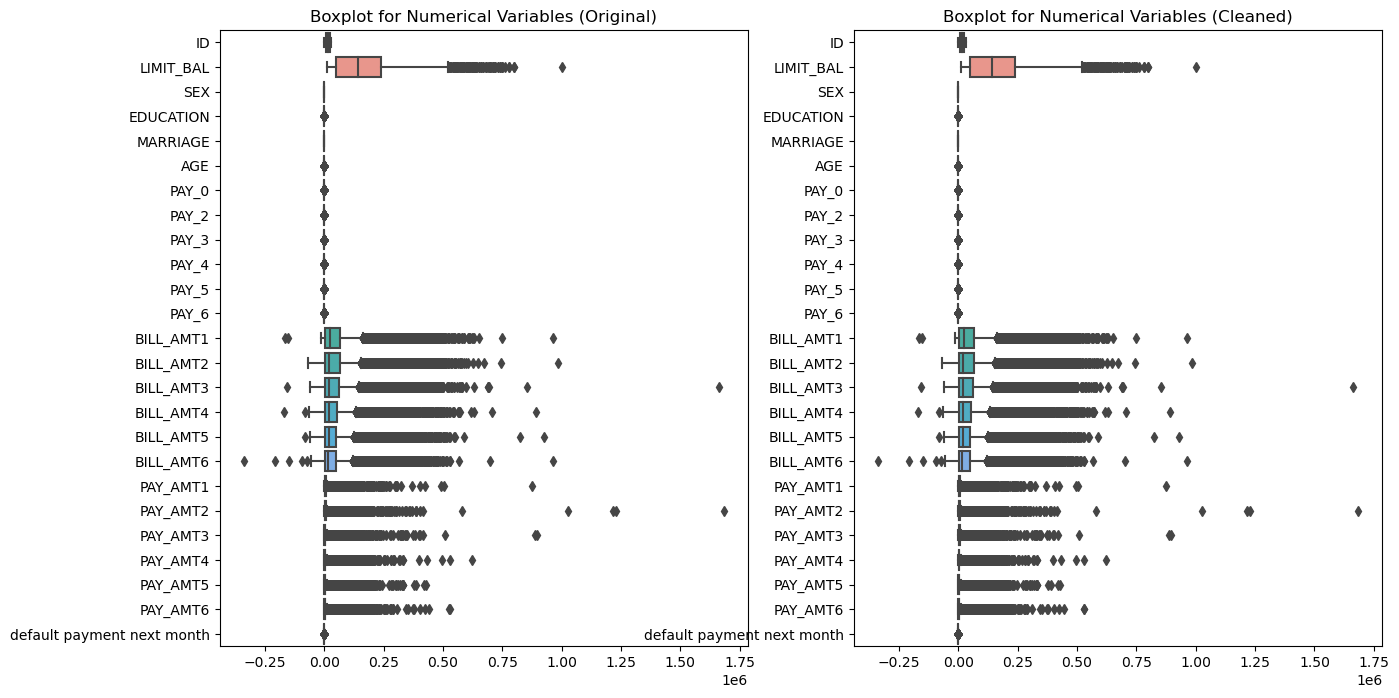

In [ ]:
# Visualize box plots for numerical variables in both original and cleaned datasets
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
sns.boxplot(data=data, orient="h")
plt.title('Boxplot for Numerical Variables (Original)')

plt.subplot(1, 2, 2)
sns.boxplot(data=data_cleaned, orient="h")
plt.title('Boxplot for Numerical Variables (Cleaned)')

plt.show()


# 5. Apply Statistics:

# Descriptive statistics for Original dataset

In [ ]:
# EDA - Descriptive Statistics
data.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Descriptive statistics for cleaned dataset



In [ ]:
# Check descriptive statistics for the cleaned dataset

statistics_cleaned = data_cleaned.describe()
print("Descriptive statistics for cleaned dataset:\n", statistics_cleaned)


Descriptive statistics for cleaned dataset:
                  ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500      0.356767      0.320033      0.304067      

# summary statistics



In [ ]:
# Check summary statistics after removing outliers
summary_stats_cleaned = data_cleaned.describe()
print(summary_stats_cleaned)


                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500      0.356767      0.320033      0.304067      0.258767   
std        9.217904      0.760594

# Confidence Interval



In [ ]:
# Confidence Interval - Example for LIMIT_BAL

from scipy.stats import norm
import numpy as np

confidence_interval = norm.interval(0.95, loc=data['LIMIT_BAL'].mean(), scale=data['LIMIT_BAL'].std() / np.sqrt(len(data)))
print(f"95% Confidence Interval for Credit Limit: {confidence_interval}")



95% Confidence Interval for Credit Limit: (166016.11663807486, 168952.5286952585)


# 6. Build ML Model:

 1. Logistic Regression Model
 2. Decision Tree Classifier Model

# Import necessary libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



# Feature Selection and Encoding

In [ ]:
# Feature Selection and Encoding
features = ['LIMIT_BAL', 'AGE', 'EDUCATION', 'MARRIAGE']  # Add more features as needed
X = data[features]
y = data['default payment next month']



# Label Encoding

In [ ]:
# Label Encoding for categorical variables
le = LabelEncoder()
X['EDUCATION'] = le.fit_transform(X['EDUCATION'])
X['MARRIAGE'] = le.fit_transform(X['MARRIAGE'])



C:\Users\user\AppData\Local\Temp\ipykernel_3068\2896803957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['EDUCATION'] = le.fit_transform(X['EDUCATION'])
C:\Users\user\AppData\Local\Temp\ipykernel_3068\2896803957.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['MARRIAGE'] = le.fit_transform(X['MARRIAGE'])


# Feature Scaling

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Logistic Regression Model Evaluation

In [ ]:
# Logistic Regression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)



LogisticRegression()

In [ ]:
# Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



In [ ]:
# Evaluate Logistic Regression Model
print("Logistic Regression Model:")
evaluate_model(log_reg_model, X_test_scaled, y_test)

Logistic Regression Model:
Accuracy: 0.7811666666666667
Confusion Matrix:
[[4687    0]
 [1313    0]]
Classification Report:


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         No        0.78      1.00      0.88      4687
        Yes        0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree Classifier Model Evaluation

In [ ]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)



DecisionTreeClassifier()

In [ ]:
# Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



In [ ]:
# Evaluate Decision Tree Model
print("\nDecision Tree Model:")
evaluate_model(dt_model, X_test_scaled, y_test)



Decision Tree Model:
Accuracy: 0.7456666666666667
Confusion Matrix:
[[4339  348]
 [1178  135]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85      4687
           1       0.28      0.10      0.15      1313

    accuracy                           0.75      6000
   macro avg       0.53      0.51      0.50      6000
weighted avg       0.68      0.75      0.70      6000



# Estimate the probability of default

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Select relevant features and target variable
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
target = 'default payment next month'

# Split data into features and target variable
X = data_cleaned[features]
y = data_cleaned[target]

# Convert categorical variables to dummy variables if needed
X = pd.get_dummies(X, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

# Estimate the Model Prediction and Performance

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Estimate probabilities for each class (0: non-default, 1: default)
probabilities = model.predict_proba(X_test)[:, 1]


In [ ]:
# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7811666666666667
Confusion Matrix:
 [[4687    0]
 [1313    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
